# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

# Work Flow
* Import Libraries
* Load Data
* EDA
* Split the data
* Transform the data

In [27]:
import pandas as pd
import numpy as np
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow
from keras.metrics import accuracy
from sklearn.metrics import accuracy_score, classification_report
#Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing the necessary packages
from tensorflow import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam # - Works

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Ass_16/forestfires.csv')

In [ ]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
df.shape

(517, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [ ]:
df.duplicated().sum()

8

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [11]:
col = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area']
col

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

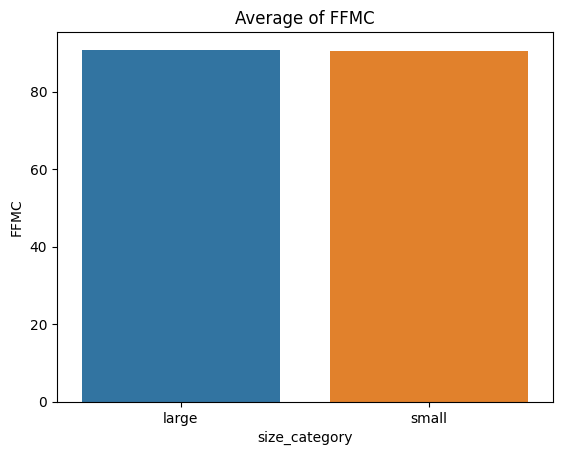

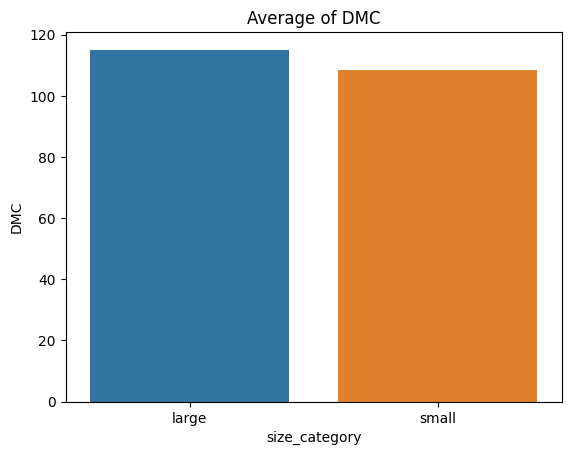

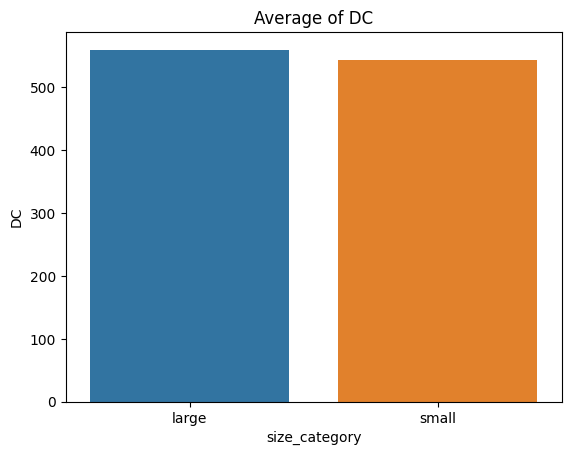

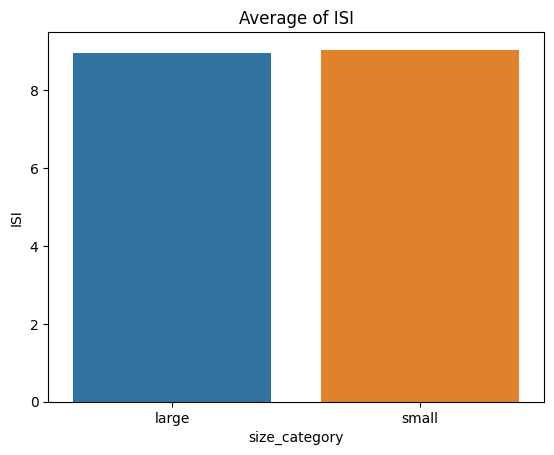

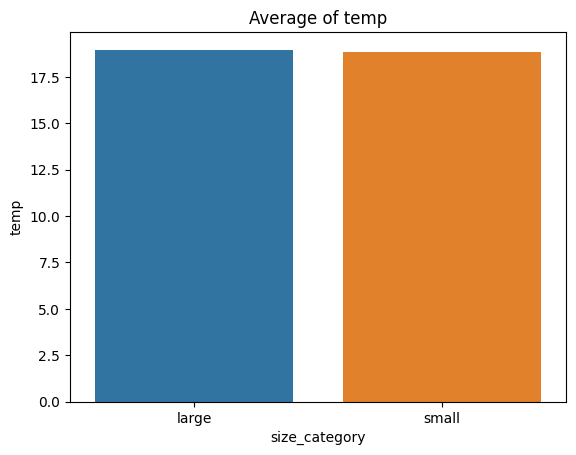

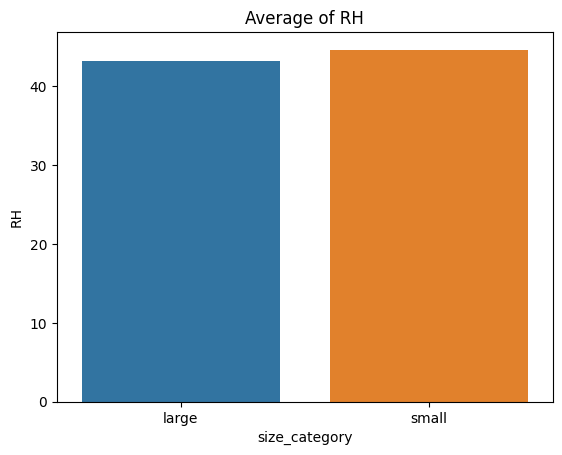

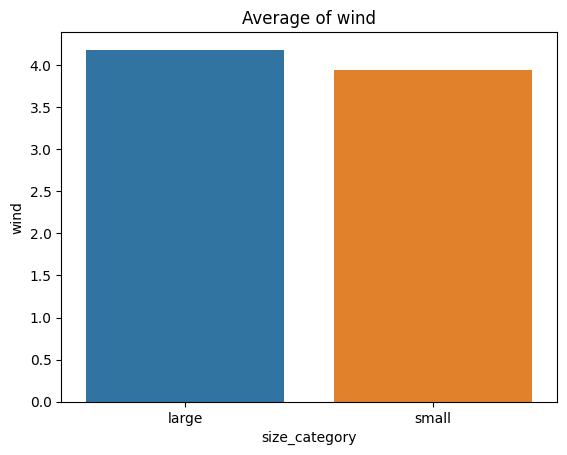

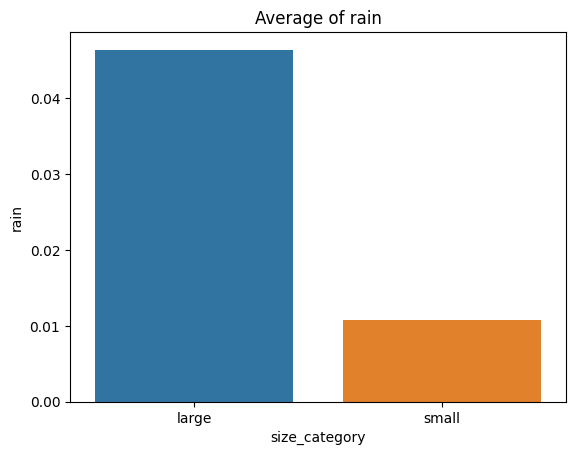

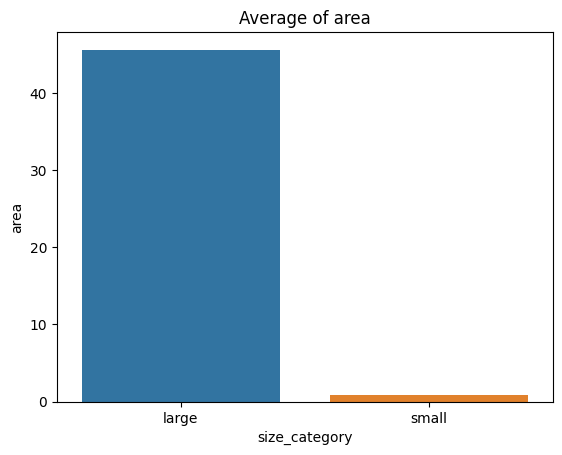

In [ ]:
for col in col:
  grp = df.groupby('size_category')[col].agg('mean')
  sns.barplot(x=grp.keys(), y=grp.values)
  plt.title(f'Average of {col}')
  plt.ylabel(col)
  plt.show()

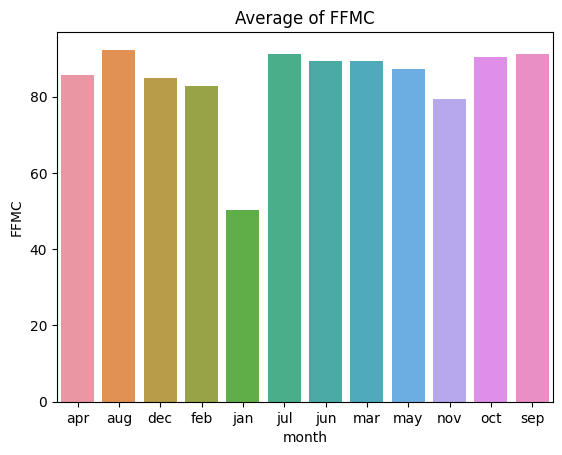

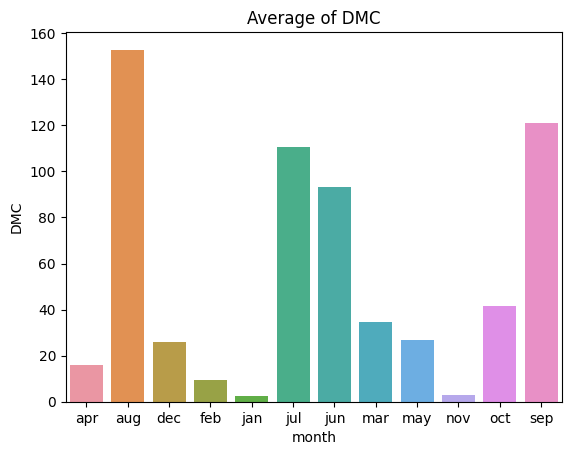

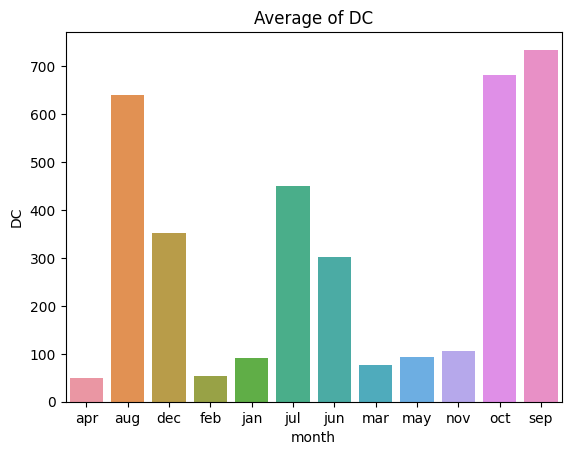

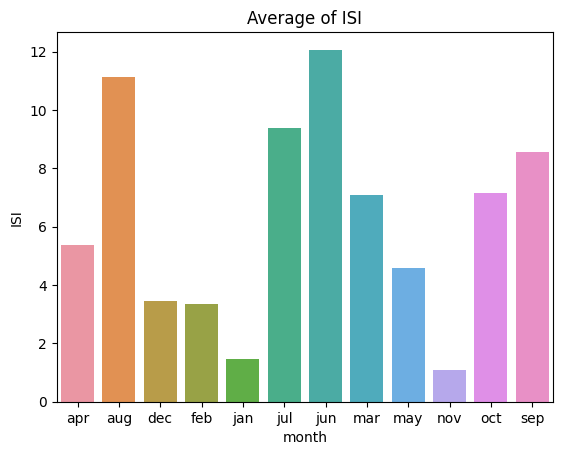

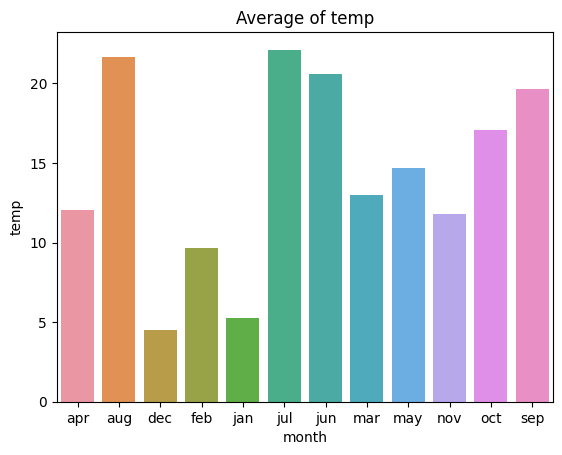

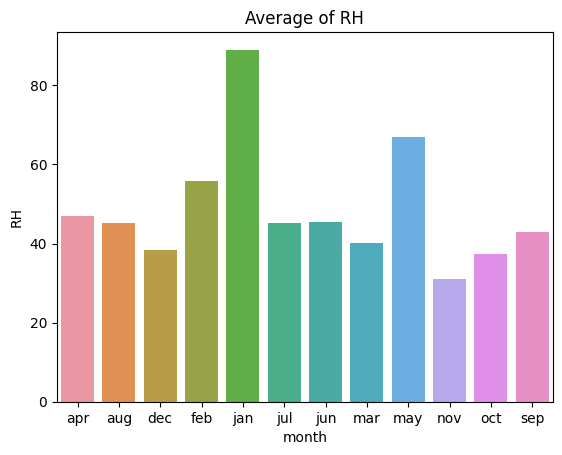

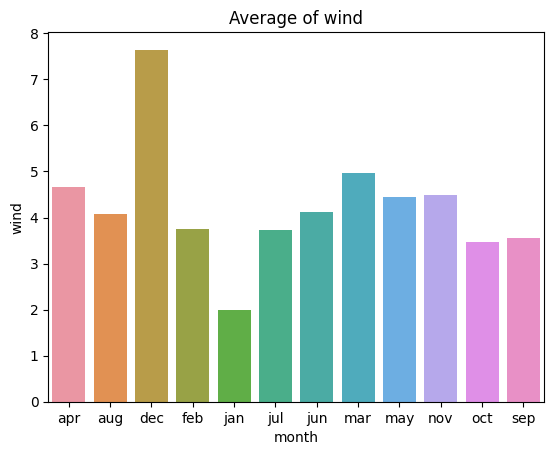

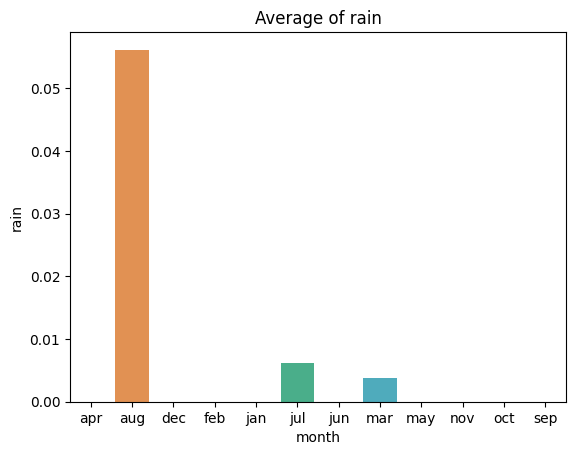

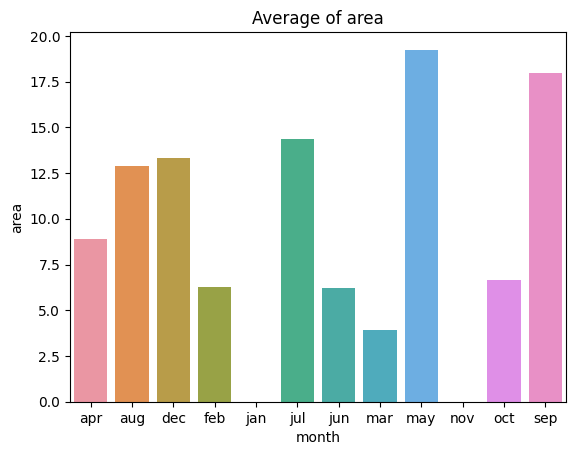

In [ ]:
for col in col:
  grp = df.groupby('month')[col].agg('mean')
  sns.barplot(x=grp.keys(), y=grp.values)
  plt.title(f'Average of {col}')
  plt.ylabel(col)
  plt.show()

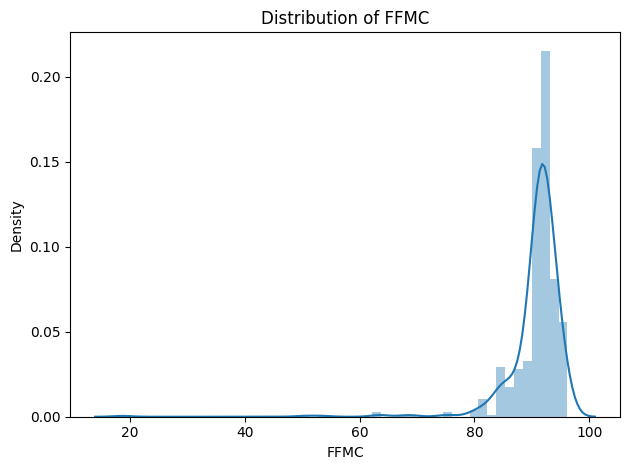

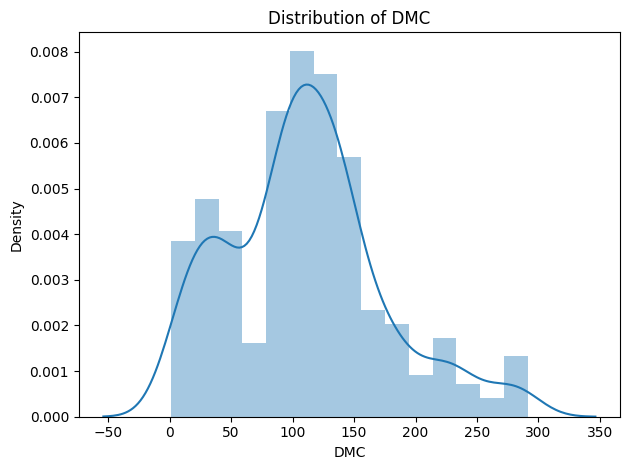

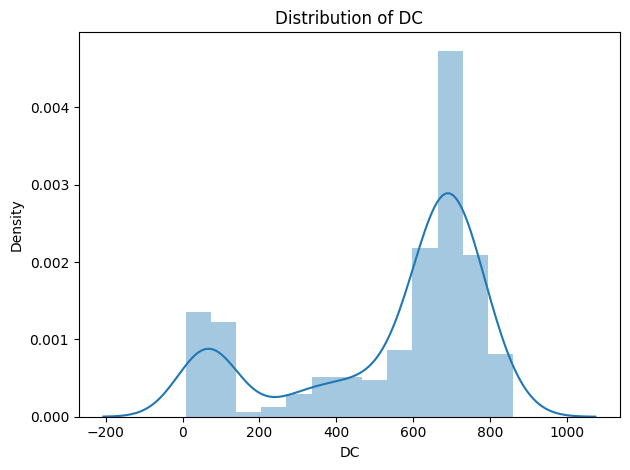

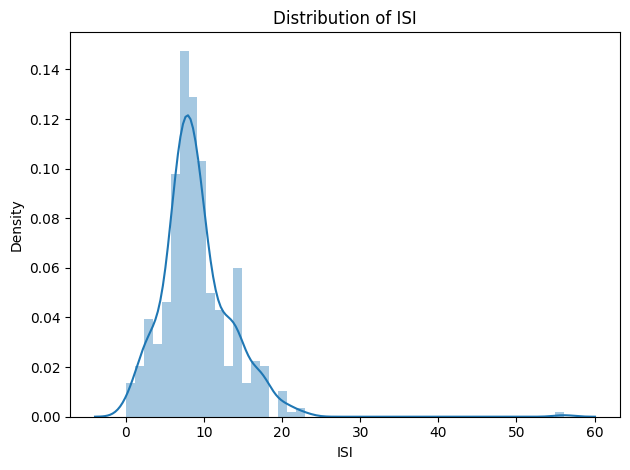

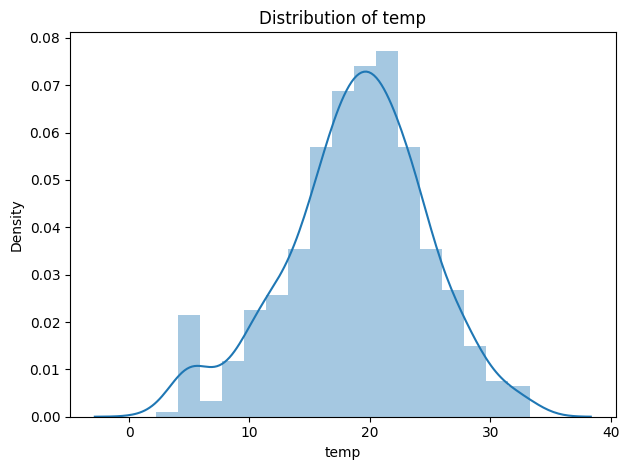

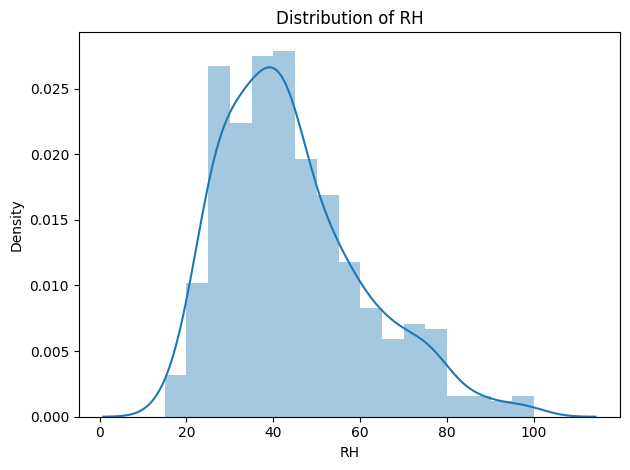

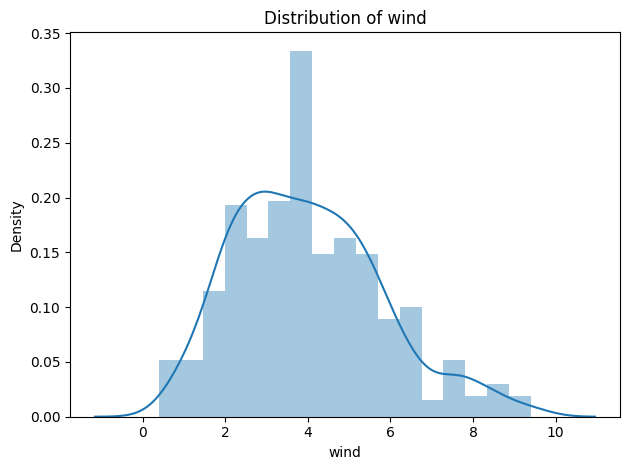

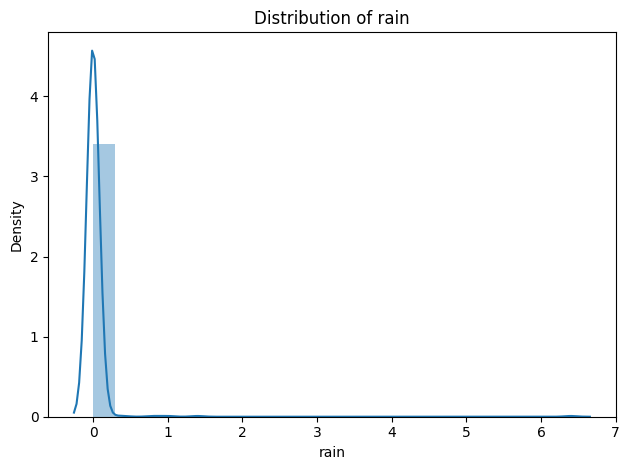

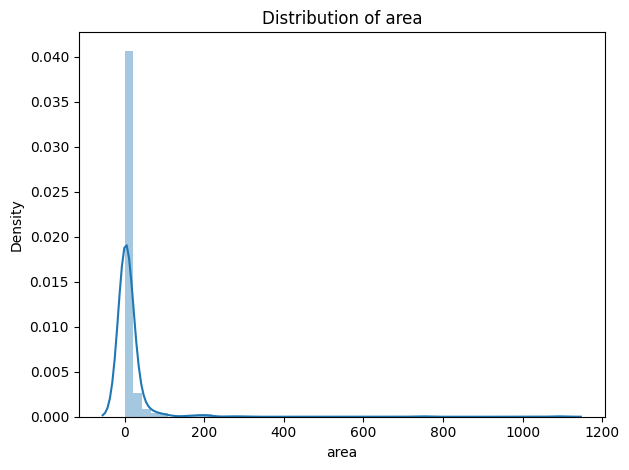

In [ ]:
for column in col:
  sns.distplot(df[column])
  plt.title(f'Distribution of {column}')
  plt.tight_layout()
  plt.show()

In [ ]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
dff = df.copy()

In [7]:
le = LabelEncoder()
dff['size_category'] = le.fit_transform(dff['size_category'])

In [8]:
X = dff.drop(columns=['month', 'day', 'size_category'])
y = dff['size_category']

In [9]:
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: size_category, dtype: int64

* small -> 1, large -> 0

In [12]:
cat_col = []
for i in X.columns:
  if i not in col:
    cat_col.append(i)
cat_col

['dayfri',
 'daymon',
 'daysat',
 'daysun',
 'daythu',
 'daytue',
 'daywed',
 'monthapr',
 'monthaug',
 'monthdec',
 'monthfeb',
 'monthjan',
 'monthjul',
 'monthjun',
 'monthmar',
 'monthmay',
 'monthnov',
 'monthoct',
 'monthsep']

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer([('StandardScaler', StandardScaler(),col)])
transformer

ColumnTransformer(transformers=[('StandardScaler', StandardScaler(),
                                 ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
                                  'wind', 'rain', 'area'])])

In [14]:
data = transformer.fit_transform(df)
num_df = pd.DataFrame(data, columns=col)
num_df.shape

(517, 9)

In [15]:
cat_df = dff[cat_col]
cat_df.reset_index(drop=True, inplace=True)

In [16]:
cat_df.index

RangeIndex(start=0, stop=517, step=1)

In [17]:
num_df.index

RangeIndex(start=0, stop=517, step=1)

In [18]:
X_transformed = pd.concat((num_df, cat_df), axis=1)
X_transformed.shape, X.shape

((517, 28), (517, 28))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=24)

# Hyperparameter Tuning

In [ ]:
# Define the model
def create_model(learning_rate, dropout_rate, activation_function, init, neuron1, neuron2):
  model = Sequential()
  model.add(Dense(neuron1, input_dim=28, kernel_initializer=init))
  model.add(Dropout(dropout_rate))
  model.add(Dense(neuron2, kernel_initializer=init, activation=activation_function))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation='sigmoid'))

  adam = Adam(learning_rate=learning_rate)
  model.compile(loss = 'binary_crossentropy', optimizer=adam, metrics=['accuracy'])
  return model

In [ ]:
# Create the model
model = KerasClassifier(build_fn = create_model, verbose=0)

In [ ]:
param_grids = {'batch_size':[10,20,40,50],
               'epochs':[10,50,100],
               'learning_rate':[0.001,0.01,0.1],
               'dropout_rate':[0.0,0.1,0.2],
               'activation_function':['softmax','relu','tanh','linear'],
               'init':['uniform','normal','zero'],
               'neuron1':[4,8,16,32],
               'neuron2':[2,4,8,28]
               }

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grids, cv=KFold(), verbose=10)
grid.fit(X_transformed, y)
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

# Build the Model

In [42]:
model = Sequential()

In [43]:
model.add(Dense(32, input_dim=28, kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(28,kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [44]:
model.compile(
    optimizer = Adam(learning_rate=0.01),
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                928       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 28)                924       
                                                                 
 dropout_7 (Dropout)         (None, 28)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 29        
                                                                 
Total params: 1,881
Trainable params: 1,881
Non-trainable params: 0
_________________________________________________________________


In [46]:
his = model.fit(X_transformed,y, validation_data=(X_train, y_train),batch_size=50,epochs=50)

Epoch 1/50
11/11 [==============================] - 2s 45ms/step - loss: 0.6273 - accuracy: 0.7041 - val_loss: 0.5810 - val_accuracy: 0.7215
Epoch 2/50
11/11 [==============================] - 0s 9ms/step - loss: 0.5371 - accuracy: 0.7408 - val_loss: 0.5129 - val_accuracy: 0.7506
Epoch 3/50
11/11 [==============================] - 0s 9ms/step - loss: 0.4928 - accuracy: 0.7776 - val_loss: 0.4500 - val_accuracy: 0.7845
Epoch 4/50
11/11 [==============================] - 0s 13ms/step - loss: 0.4097 - accuracy: 0.8337 - val_loss: 0.3498 - val_accuracy: 0.8596
Epoch 5/50
11/11 [==============================] - 0s 9ms/step - loss: 0.3339 - accuracy: 0.8743 - val_loss: 0.2676 - val_accuracy: 0.8789
Epoch 6/50
11/11 [==============================] - 0s 16ms/step - loss: 0.2708 - accuracy: 0.9033 - val_loss: 0.1962 - val_accuracy: 0.9346
Epoch 7/50
11/11 [==============================] - 0s 14ms/step - loss: 0.2196 - accuracy: 0.9110 - val_loss: 0.1497 - val_accuracy: 0.9588
Epoch 8/50
11/11

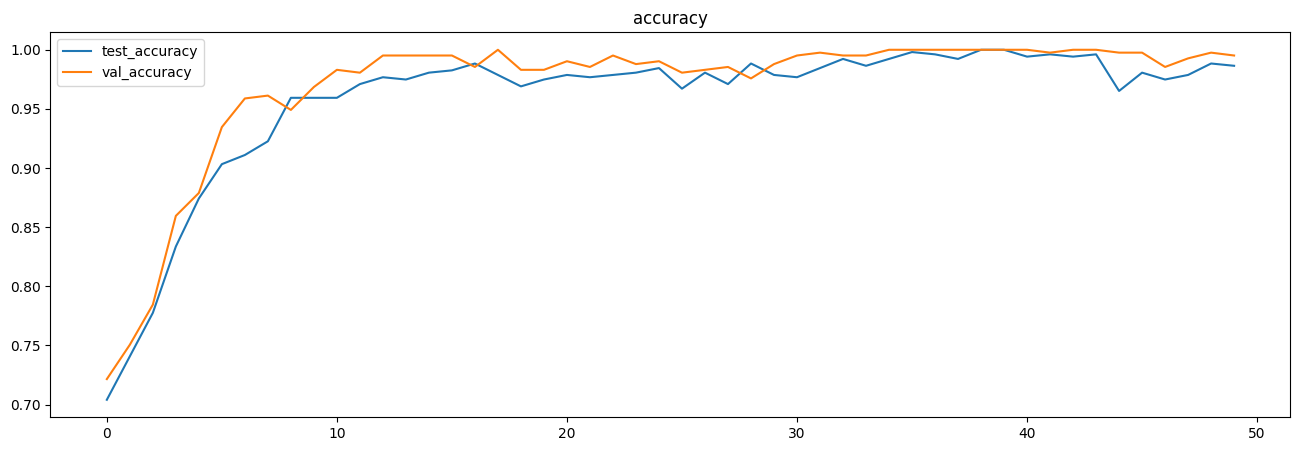

In [47]:

plt.figure(figsize=(16,5))
plt.plot(his.history['accuracy'], label='test_accuracy')
plt.plot(his.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()
plt.show()

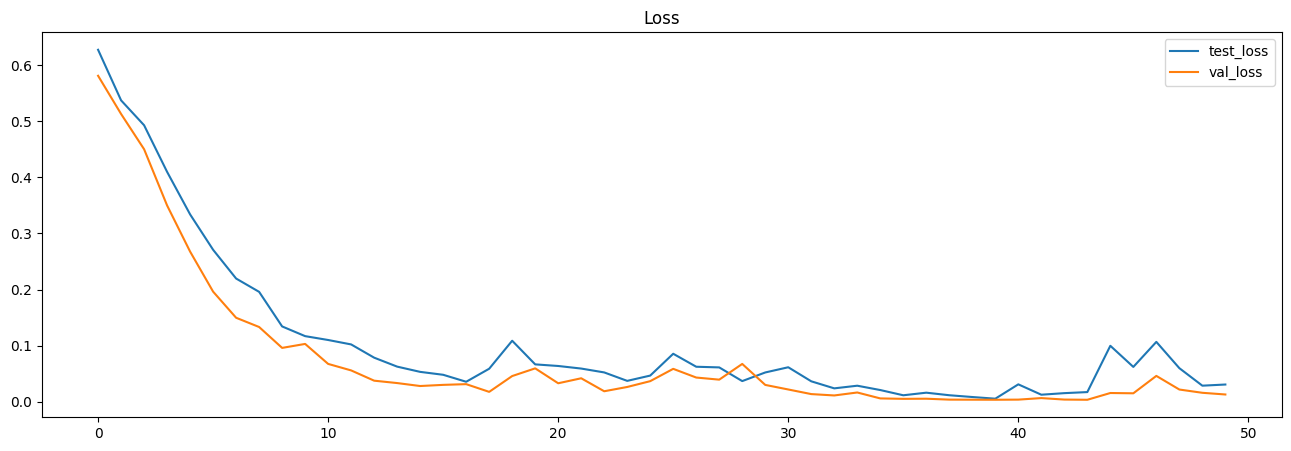

In [48]:
plt.figure(figsize=(16,5))
plt.plot(his.history['loss'], label='test_loss')
plt.plot(his.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()
plt.show()

# Conclusion

1. I did EDA and found some meaningful insights from visualization.
* Approximataly equal amount of FFMC in large and small areas.
* Maximum FFMC found in August month
* DMC is maximum in the month of August.
* September, October and August are the month in which DC is greater than 600.
* August is the month on which the maximum rain happened.
2. After that I scaled the data using StandardScaler on numerical column
then concat the numerical and categorical features.
3. Then I did hyperparameter tuning to find best parameter.
4. Then I split the data into train and test.
5. I have trainde the model and got accuracy of 100% on train as well as test data.